---
## <a class="anchor" id="data">I. Data Import and Wrangling</a>

### 1. Libraries

In [1]:
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline
import plotly as py
from sklearn.preprocessing import StandardScaler
from P5_Openclassroom_Functions import CustomerVisualisation as cv
from P5_Openclassroom_Functions import  *
import re
from datetime import timedelta
import matplotlib.dates as mdates
import sidetable
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from datetime import datetime as dt
%matplotlib inline
sns.set_style("whitegrid")


init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline
import plotly as py
from sklearn.preprocessing import StandardScaler
import re
from P5_Openclassroom_Functions import *
from datetime import timedelta
import matplotlib.dates as mdates
import sidetable
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from datetime import datetime as dt
%matplotlib inline
sns.set_style("whitegrid")

---
### 2. Importing data


In [3]:
df_orders = pd.read_csv("../data/olist_orders_dataset.csv")
df_order_items = pd.read_csv("../data/olist_order_items_dataset.csv")
df_products = pd.read_csv("../data/olist_products_dataset.csv")
df_customers = pd.read_csv('../data/olist_customers_dataset.csv')
# Importing the translation lookup table
df_translations = pd.read_csv('../data/product_category_name_translation.csv')
df_geolocation = pd.read_csv('../data/olist_geolocation_dataset.csv')
df_payments = pd.read_csv('../data/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('../data/olist_order_reviews_dataset.csv')

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
#df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
df_orders.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [8]:
# Supposons que 'date' est la colonne contenant les dates des commandes dans df_orders
# Convertir la colonne 'date' en objets datetime


# Filtrer les commandes passées depuis janvier 2017
#df_orders = df_orders.query('order_purchase_timestamp >= "2017-01-01"')
df_orders = df_orders[df_orders['order_purchase_timestamp'] >= '2017-01-01']


In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99112 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99112 non-null  object
 1   customer_id                    99112 non-null  object
 2   order_status                   99112 non-null  object
 3   order_purchase_timestamp       99112 non-null  object
 4   order_approved_at              98958 non-null  object
 5   order_delivered_carrier_date   97377 non-null  object
 6   order_delivered_customer_date  96204 non-null  object
 7   order_estimated_delivery_date  99112 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


In [10]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99112,99112,99112,99112,98958,97377,96204,99112
unique,99112,99112,8,98546,90411,80749,95394,423
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96211,3,9,47,3,522


In [11]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


2 965 dates de livraison manquantes au client (3%).

Les dates devront être formatées en tant que dates et heures. Les dates seront réduites à la date uniquement (sans l'heure), afin qu'elles puissent être regroupées par jour ultérieurement.

Pour notre projet, les dates d'achat, de livraison et de livraison estimée sont importantes. Je convertis ces deux colonnes en format datetime et je remplis les valeurs manquantes de la colonne 'order_delivered_customer_date' avec 'ffill' (remplissage avant). Deux points à prendre en compte : 1) La liste doit être triée. 2) 'ffill' ne fonctionnera pas pour les premières cellules si elles appartiennent aux cellules vides.


Il pourrait être utile de conserver les timestamp de la commande et de la livraison (h:m:s) également pour une analyse ultérieure.

In [13]:
df_orders['order_time'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.time
df_orders['delivery_time'] = pd.to_datetime(df_orders['order_delivered_carrier_date']).dt.time

In [14]:
#converting date
convert_to_dt(df_orders, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
df_orders.sort_values(by = 'order_purchase_timestamp', inplace = True)

In [15]:
df_orders['order_delivered_customer_date'].isna().sum()

2908

In [16]:
# Substitute missing date values through forward fill:
for col in [
    'order_delivered_customer_date',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'delivery_time'
    ]:
    df_orders[col] = df_orders[col].ffill()
# check:
print('Missing values: ', df_orders['order_delivered_customer_date']\
    .isnull()\
    .sum())

Missing values:  0


In [17]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99112 entries, 4715 to 60938
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99112 non-null  object
 1   customer_id                    99112 non-null  object
 2   order_status                   99112 non-null  object
 3   order_purchase_timestamp       99112 non-null  object
 4   order_approved_at              99112 non-null  object
 5   order_delivered_carrier_date   99112 non-null  object
 6   order_delivered_customer_date  99112 non-null  object
 7   order_estimated_delivery_date  99112 non-null  object
 8   order_time                     99112 non-null  object
 9   delivery_time                  99112 non-null  object
dtypes: object(10)
memory usage: 8.3+ MB


Ça semble bon. Je vais également ajouter une colonne où la date de la commande est exprimée en format ordinal. Ce format numérique simplifiera certaines des étapes ultérieures.

In [18]:
# Adding ordinal date column:
df_orders['date_ordinal'] = df_orders['order_purchase_timestamp']\
                            .apply(lambda date: date.toordinal())


En ce qui concerne le temps de livraison, les valeurs suivantes peuvent être d'intérêt :

Différence entre la date de livraison estimée et la date de livraison réelle (shipping_time_delta)
Différence entre la date de commande et la date de livraison (shipping_duration)
Différence entre la date de commande et la date de livraison estimée (estimated_duration)
Ces colonnes seront créées :

In [19]:
df_orders['shipping_time_delta'] = df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']
df_orders['shipping_duration'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
df_orders['estimated_duration'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']

In [20]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,date_ordinal,shipping_time_delta,shipping_duration,estimated_duration
4715,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,736334,"16 days, 0:00:00","11 days, 0:00:00","27 days, 0:00:00"
28014,464de32dc84484c1d26df3e8e38e708b,27129ce1ebca4ffa23a049c51cc8ec95,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-13,15:25:04,15:59:08,736334,"27 days, 0:00:00","12 days, 0:00:00","39 days, 0:00:00"
82436,8a784d47854e4cbc5562362393d504db,a969b9f8d923bc7fd97b578f7c499194,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-13,14:18:03,16:08:56,736334,"27 days, 0:00:00","12 days, 0:00:00","39 days, 0:00:00"


Vérification s'il existe des commandes répétées :

In [21]:
print('Total of unique orders: {} \n\
Total of records: {}'
    .format(len(df_orders['order_id'].unique()), len(df_orders)))

Total of unique orders: 99112 
Total of records: 99112


---
## Preparation Order_item data
La table contient les détails des commandes avec les numéros d'identification des produits, les vendeurs et les prix.

In [22]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [25]:
# Checking how many unique orders are listed
print('Total of unique order_ids in order_item table: {} \n\
Total of unique orders_item_ids in order_item table: {} \n\
Total of unique order_ids in order table: {} \n\
Total of records in order_items: {}'
    .format(
    df_order_items['order_id'].nunique(),
    df_order_items['order_item_id'].nunique(),
    df_orders['order_id'].nunique(),
    len(df_order_items))
    )

Total of unique order_ids in order_item table: 98666 
Total of unique orders_item_ids in order_item table: 21 
Total of unique order_ids in order table: 99112 
Total of records in order_items: 112650


In [26]:
# All order_ids from order_items are contained in orders? 
df_order_items['order_id'].isin(df_orders['order_id']).value_counts()

order_id
True     112280
False       370
Name: count, dtype: int64

Il y a 775 commandes (0,8 %) pour lesquelles nous n'avons pas de détails. Nous pouvons jeter un coup d'œil à celles-ci :

<Axes: xlabel='order_status'>

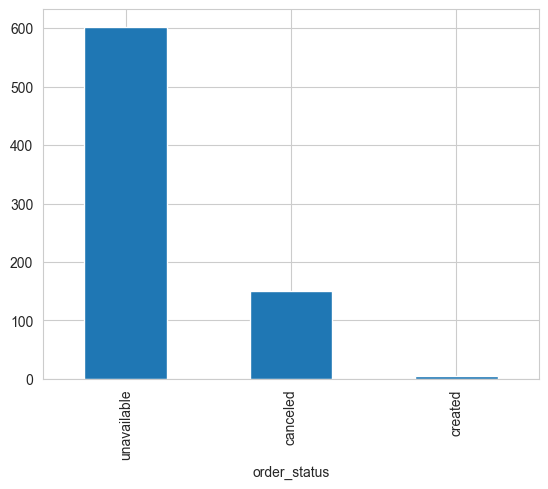

In [27]:
# All order_ids from orders are contained in orders_items?
df_orders[~df_orders['order_id'].isin(df_order_items['order_id'])]['order_status'].value_counts().plot(kind='bar')

La grande majorité des commandes sans détails sont marquées comme "non disponibles" ou "annulées". Je suppose que ces deux conditions conduisent à la même conclusion : la commande n'a pas été exécutée. Je vais donc supprimer ces enregistrements de l'ensemble de données.

In [28]:
df_orders = df_orders[df_orders['order_id'].isin(df_order_items['order_id'])]

In [29]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,date_ordinal,shipping_time_delta,shipping_duration,estimated_duration
4715,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,736334,"16 days, 0:00:00","11 days, 0:00:00","27 days, 0:00:00"
28014,464de32dc84484c1d26df3e8e38e708b,27129ce1ebca4ffa23a049c51cc8ec95,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-13,15:25:04,15:59:08,736334,"27 days, 0:00:00","12 days, 0:00:00","39 days, 0:00:00"
82436,8a784d47854e4cbc5562362393d504db,a969b9f8d923bc7fd97b578f7c499194,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-13,14:18:03,16:08:56,736334,"27 days, 0:00:00","12 days, 0:00:00","39 days, 0:00:00"
74670,38bcb524e1c38c2c1b60600a80fc8999,d2c63ad286e3ca9dd69218008d61ff81,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-13,12:06:36,15:35:54,736334,"28 days, 0:00:00","11 days, 0:00:00","39 days, 0:00:00"
36588,2f9d791088532b218b41f892cc16073b,937bb74713a47912471275b234236764,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-13,13:48:48,16:08:53,736334,"27 days, 0:00:00","12 days, 0:00:00","39 days, 0:00:00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31486,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-11,14:18:28,18:51:00,736935,"12 days, 0:00:00","1 day, 0:00:00","13 days, 0:00:00"
88412,912859fef5a0bd5059b6d48fa79d121a,b8c19e70d00f6927388e4f31c923d785,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-04,09:48:09,19:01:00,736935,"5 days, 0:00:00","1 day, 0:00:00","6 days, 0:00:00"
6883,bee12e8653a04e76786e8891cfb6330a,448945bc713d98b6726e82eda6249b9e,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-11,08:46:11,13:03:00,736935,"12 days, 0:00:00","1 day, 0:00:00","13 days, 0:00:00"
88097,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-05,15:00:37,16:57:00,736935,"6 days, 0:00:00","1 day, 0:00:00","7 days, 0:00:00"


In [30]:
# Checking duplicate entries and duplicate order lines:
print('Number of duplicated records: {} \n\
    Number of duplicated order lines: {}'
      .format(df_order_items.duplicated().sum(),
              df_order_items[['order_id', 'product_id']].duplicated().sum()))

Number of duplicated records: 0 
    Number of duplicated order lines: 10225


Cela explique pourquoi il n'y a pas de colonne de quantité de commande. Les enregistrements dupliqués sont en réalité la même ligne de commande, mais décomposés en plusieurs enregistrements.

En d'autres termes : La structure de cette table d'articles de commande n'utilise pas les quantités de commande mais des lignes de commande répétées ('order_item_id' est un compteur de lignes de commande en cours).

Nous avons besoin d'une quantité pour une analyse du profil de commande. Une nouvelle colonne de quantité ('qty') sera ajoutée, qui accumule la quantité de commande.

In [31]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [32]:
# Grouping by SKU and order ID:
df_order_items_consolidated = df_order_items\
    .groupby(by = ['product_id','order_id'], as_index=False)\
    .agg({
        'order_item_id': 'count', 
        'seller_id': 'first',
        'shipping_limit_date': 'first',
        'price': 'first',
        'freight_value': 'first'
        })

In [33]:
df_order_items_consolidated[df_order_items_consolidated['order_item_id']>1]

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
12,001795ec6f1b187d37335e1c4704762e,c432657bb18ddf7f48b7227db09048d4,2,8b321bb669392f5163d04c59e235e066,2017-12-18 00:39:25,38.90,16.11
14,001795ec6f1b187d37335e1c4704762e,dd436680fbd2d38edb26277f5b8379dc,2,8b321bb669392f5163d04c59e235e066,2017-12-29 15:30:50,38.90,9.34
27,001b72dfd63e9833e8c02742adf472e3,c214276ccd69c3953f880b487209f47e,2,8a32e327fe2c1b3511609d81aaf9f042,2017-07-13 15:43:15,34.99,7.78
28,001b72dfd63e9833e8c02742adf472e3,ce76ffbfb04b7dc8293ca658f75963cc,2,8a32e327fe2c1b3511609d81aaf9f042,2017-02-19 22:49:35,34.99,16.05
32,00210e41887c2a8ef9f791ebc780cc36,2d8e71bf7d31a41d40f122c8173fdf06,2,e9779976487b77c6d4ac45f75ec7afe9,2017-06-08 02:25:25,32.98,15.10
...,...,...,...,...,...,...,...
102319,ffbe169d395060d7fb975c990581a329,541c0eac677c2bba8a6417b7e9d8667f,2,5a8e7d5003a1f221f9e1d6e411de7c23,2017-06-01 03:10:17,39.90,14.10
102353,ffc9caf33e2d1e9f44e3e06da19085f7,c8c0e74f5426e74b812efe05eaab11a6,2,b18dc380845b24038cfc48006478f099,2018-06-06 12:50:26,199.89,16.28
102404,ffef256879dbadcab7e77950f4f4a195,808b7fff91e537a5df90717957ee5bb1,2,113e3a788b935f48aad63e1c41dac1bd,2018-06-15 19:54:42,31.78,18.23
102410,fff0a542c3c62682f23305214eaeaa24,be48bdef069ed1eb0d320bfe65d26351,2,08d2d642cf72b622b14dde1d2f5eb2f5,2017-12-07 19:53:44,7.50,12.69


In [34]:
# Checking is no info was lost
print('Orders in new table: {} \n\
Orders in old table: {} \n\
SKUs in new table: {} \n\
SKUs in old table: {} \n\
Total quantity in new table: {} \n\
Total quantity in old table: {}'
    .format(
    len(df_order_items_consolidated['order_id'].unique()),
    len(df_order_items['order_id'].unique()),
    len(df_order_items_consolidated['product_id'].unique()),
    len(df_order_items['product_id'].unique()),
    df_order_items_consolidated['order_item_id'].sum(),
    len(df_order_items)
    ))

Orders in new table: 98666 
Orders in old table: 98666 
SKUs in new table: 32951 
SKUs in old table: 32951 
Total quantity in new table: 112650 
Total quantity in old table: 112650


In [35]:
# Renaming new quantity column
df_order_items_consolidated\
    .rename(columns = {'order_item_id': 'qty'}, inplace = True)

In [36]:
# Check
df_order_items_consolidated.head()

,product_id,order_id,qty,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60


In [37]:
# Peek at the order quantity distribution
df_order_items_consolidated['qty'].value_counts()

qty
1     95337
2      5382
3       953
4       390
6       172
5       168
10        5
7         4
12        2
9         2
15        2
14        2
8         2
20        2
11        1
13        1
Name: count, dtype: int64

In [38]:
df_order_items_consolidated['qty'].mean()

1.0998291432755676

In [39]:
df_order_items_consolidated = df_orders\
    .merge(df_order_items_consolidated, on = 'order_id')

In [40]:
df_order_items_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102093 entries, 0 to 102092
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102093 non-null  object 
 1   customer_id                    102093 non-null  object 
 2   order_status                   102093 non-null  object 
 3   order_purchase_timestamp       102093 non-null  object 
 4   order_approved_at              102093 non-null  object 
 5   order_delivered_carrier_date   102093 non-null  object 
 6   order_delivered_customer_date  102093 non-null  object 
 7   order_estimated_delivery_date  102093 non-null  object 
 8   order_time                     102093 non-null  object 
 9   delivery_time                  102093 non-null  object 
 10  date_ordinal                   102093 non-null  int64  
 11  shipping_time_delta            102093 non-null  object 
 12  shipping_duration             

---
## Preparation la table Products


In [41]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [42]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
df_products['product_id'].duplicated().sum()

0

In [44]:
print('SKU count in order table: {} \n\
SKU count in product table: {}'
    .format(
    len(df_order_items_consolidated['product_id'].unique()),
    len(df_products['product_id'].unique())
    ))
df_products['product_id'].equals(df_order_items_consolidated['product_id'])

SKU count in order table: 32787 
SKU count in product table: 32951


False

In [45]:
df_order_items_consolidated = df_order_items_consolidated\
    .merge(df_products, on = 'product_id')

In [46]:
df_order_items_consolidated.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_time                          0
delivery_time                       0
date_ordinal                        0
shipping_time_delta                 0
shipping_duration                   0
estimated_duration                  0
product_id                          0
qty                                 0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1458
product_name_lenght              1458
product_description_lenght       1458
product_photos_qty               1458
product_weight_g                   16
product_length_cm                  16
product_heig


6 références (0,05 %) de produits n'ont pas d'informations sur leurs dimensions, ce qui est négligeable. Nous allons remplacer ces informations manquantes par les moyennes.

In [48]:
subst_mean(df_order_items_consolidated, [
    'product_length_cm',
    'product_weight_g',
    'product_height_cm',
    'product_width_cm'
    ])


Cela semble bien. Nous allons ajouter une colonne supplémentaire 'cube' pour avoir l'information sur le volume expédié à portée de main.

In [49]:
df_order_items_consolidated['order_line_cube_in_ltr']\
    = df_order_items_consolidated['product_length_cm']\
    *df_order_items_consolidated['product_height_cm']\
    *df_order_items_consolidated['product_width_cm']\
   *df_order_items_consolidated['qty'] /1000


---
## Preparation la table Customer

In [50]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [51]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


il y a deux identifications de client, l'une étant un "identifiant unique" et l'autre le "champ clé" servant de lien vers les tables des commandes. Cela signifie que le champ customer_id n'est pas en réalité un identifiant unique pour le client. Il pourrait y avoir deux commandes avec des customer_ids différents, mais en réalité, ces commandes proviennent du même client.

In [52]:
df_customers['customer_id'].nunique()

99441

In [53]:
df_customers['customer_unique_id'].nunique()

96096

In [54]:
df_customer_data_mart=df_order_items_consolidated.copy()

In [55]:
n_customers = df_customers['customer_unique_id'].nunique()
n_SKUs = df_customer_data_mart['product_id'].nunique()
n_orders = df_customer_data_mart['order_id'].nunique()
print('Unique customers: {}'.format(n_customers))
print('Unique SKUs: {}'.format(n_SKUs))
print('Unique orders: {}'.format(n_orders))

Unique customers: 96096
Unique SKUs: 32787
Unique orders: 98354


In [56]:
# Creating a customer dictionary as a lookup source
dict_customer = df_customers.set_index('customer_id').to_dict()['customer_unique_id']
len(dict_customer)

99441

In [57]:
# Adding column with unitque user ID to consolidated order table
df_customer_data_mart['customer_unique_id'] = df_customer_data_mart['customer_id'].map(dict_customer)

In [58]:
df_customer_data_mart.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_line_cube_in_ltr,customer_unique_id
0,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d
1,cce1b8a1c5f8b1d224e19628299c8f54,63433f6eb6f0a79cbb24e940d0ab17ad,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-01,13:33:45,15:35:53,...,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,0.352,6222ef69df52b4ed71be551725551cc0
2,ca5a215980675471f0cf8199c041909a,588047d7101d88c333691e47659d7099,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-01,14:23:54,15:37:55,...,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d
3,ce86fa5a5108884726a2244bcae51ae6,8fa33a3159dfc303b8aeccf859b9bee5,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,13:29:03,15:35:54,...,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,0.352,d753459418d268407f19b64be28e3c5a
4,7004296aa0256632eaddc171edaf727f,3a7856f2a103364d279de7f72e18b7c4,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,13:31:22,15:35:53,...,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,0.352,29a63a400c3ca9982907ce8de1f19527


In [59]:
# Check
df_customer_data_mart['customer_unique_id'].nunique()

95121

In [60]:
df_customers['customer_unique_id'].nunique()

96096

In [61]:
# All order_ids from order_items are contained in orders? 
df_customers[~df_customers['customer_unique_id'].isin(df_customer_data_mart['customer_unique_id'])].nunique()

customer_id                 987
customer_unique_id          975
customer_zip_code_prefix    903
customer_city               399
customer_state               25
dtype: int64

Cela semble avoir fonctionné et prouve que certains clients ont passé plus d'une ligne de commande. Certains clients n'ont passé aucune commande.

In [62]:
df_customer_data_mart = df_customer_data_mart.merge(df_customers[['customer_unique_id','customer_city','customer_state']], how = 'inner', left_on = 'customer_unique_id', right_on = 'customer_unique_id')  
df_customer_data_mart = df_customer_data_mart.rename(columns={"customer_city": "city"})
df_customer_data_mart = df_customer_data_mart.rename(columns={"customer_state": "state"})

In [63]:
df_customer_data_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110389 entries, 0 to 110388
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110389 non-null  object 
 1   customer_id                    110389 non-null  object 
 2   order_status                   110389 non-null  object 
 3   order_purchase_timestamp       110389 non-null  object 
 4   order_approved_at              110389 non-null  object 
 5   order_delivered_carrier_date   110389 non-null  object 
 6   order_delivered_customer_date  110389 non-null  object 
 7   order_estimated_delivery_date  110389 non-null  object 
 8   order_time                     110389 non-null  object 
 9   delivery_time                  110389 non-null  object 
 10  date_ordinal                   110389 non-null  int64  
 11  shipping_time_delta            110389 non-null  object 
 12  shipping_duration             


---
## Preparation la table Translations

In [64]:
df_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [65]:
df_translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [66]:
# adding the english procuct category name to the products list
df_products = df_products.merge(df_translations, on='product_category_name', how='left')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [67]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [68]:
# Show all categories without translations
(
    df_products[(df_products['product_category_name_english']
    .isna()) & (~df_products['product_category_name'].isna())]
)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [69]:
# Adding manually translations
df_products['product_category_name_english'] = np.where(df_products[
    'product_category_name']=='pc_gamer',
    'pc_games',
    df_products['product_category_name_english'
    ])
df_products['product_category_name_english'] = np.where(df_products[
    'product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos',
    'portable_cooking_ware',
    df_products['product_category_name_english'
    ])

In [70]:
# Check
(
    df_products[(df_products['product_category_name_english']
    .isna()) & (~df_products['product_category_name'].isna())]
)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english


In [71]:
# Double-check
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32341 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [72]:
dict_tranlate = df_products.set_index('product_category_name')\
    .to_dict()['product_category_name_english']

In [73]:
df_customer_data_mart['product_category_name_english']\
    = df_customer_data_mart['product_category_name'].map(dict_tranlate)
df_customer_data_mart[['product_category_name', 'product_category_name_english']]

,product_category_name,product_category_name_english
0,fashion_bolsas_e_acessorios,fashion_bags_accessories
1,fashion_bolsas_e_acessorios,fashion_bags_accessories
2,fashion_bolsas_e_acessorios,fashion_bags_accessories
3,fashion_bolsas_e_acessorios,fashion_bags_accessories
4,fashion_bolsas_e_acessorios,fashion_bags_accessories
...,...,...
110384,moveis_decoracao,furniture_decor
110385,informatica_acessorios,computers_accessories
110386,artigos_de_festas,party_supplies
110387,esporte_lazer,sports_leisure


---
## Preparation la table payements

In [74]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [75]:
df_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [76]:
df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [77]:
df_customer_data_mart.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_time', 'delivery_time', 'date_ordinal', 'shipping_time_delta',
       'shipping_duration', 'estimated_duration', 'product_id', 'qty',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_line_cube_in_ltr', 'customer_unique_id', 'city', 'state',
       'product_category_name_english'],
      dtype='object')

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Regrouper par order_id et calculer la somme des paiements
total_payments = df_payments.groupby('order_id')['payment_value'].sum().reset_index()

# Regrouper par order_id et calculer la somme des prix et frais de port
total_orders = df_order_items.groupby('order_id')[['price', 'freight_value']].sum().reset_index()

# Joindre les dataframes total_payments et total_orders
merged_df = total_payments.merge(total_orders, on='order_id', how='inner')

# Calculer les différences de prix
price_diff = merged_df['payment_value'] - (merged_df['price'] + merged_df['freight_value'])
# Calculer la différence avec deux chiffres après la virgule
price_diff['difference'] = round(merged_df['payment_value'] - (merged_df['price'] + merged_df['freight_value']), 2)

price_diff['difference'] = price_diff['difference'].clip(lower=-1, upper=1)


In [79]:
# Définir une fonction personnalisée pour mettre à zéro entre -7 et 7
def clip_difference(diff):
    if -1 <= diff <= 1:
        return 0
    return diff

# Appliquer la fonction personnalisée à la colonne "difference"
price_diff['difference'] = price_diff['difference'].apply(clip_difference)


In [80]:
price_diff['difference'].describe()

count    98665.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

In [81]:
df_customer_data_mart = df_customer_data_mart.merge(df_payments[['payment_type','order_id']], how = 'left',on='order_id') 
df_customer_data_mart.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_line_cube_in_ltr,customer_unique_id,city,state,product_category_name_english,payment_type
0,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d,curitiba,PR,fashion_bags_accessories,boleto
1,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d,curitiba,PR,fashion_bags_accessories,boleto
2,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d,curitiba,PR,fashion_bags_accessories,boleto
3,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d,curitiba,PR,fashion_bags_accessories,boleto
4,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,200.0,16.0,2.0,11.0,0.352,12f5d6e1cbf93dafd9dcc19095df0b3d,curitiba,PR,fashion_bags_accessories,boleto


On oublie le payements qui ne donne pas de valeur ajoutée à la segmentation des clients que pour le payment_type

---
## Preparation la table order review

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [83]:
# Function to calculate missing values by column
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [84]:
missing_values(df_reviews)

The dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


In [85]:
imputerSimpleReview = SimpleImputer(strategy='constant', fill_value='')
df_reviews.loc[:,['review_comment_title', 'review_comment_message']] = imputerSimpleReview.fit_transform(df_reviews.loc[:,['review_comment_title', 'review_comment_message']])

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `

In [86]:
missing_values(df_reviews)

The dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [87]:
df_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [88]:
df_reviews['length_reviews_comment'] = df_reviews['review_comment_message'].map(len)


In [89]:

df_reviews['count_comment'] = pd.Series([1 if x >0 else 0 for x in df_reviews['review_comment_message'].map(len)])
df_reviews['number_reviews'] = df_reviews.groupby('order_id').count_comment.transform('nunique') 



In [90]:
df_customer_data_mart = df_customer_data_mart.merge(df_reviews.groupby('order_id')['length_reviews_comment'].agg('mean'),how='left',on='order_id')
df_customer_data_mart = df_customer_data_mart.merge(df_reviews.groupby('order_id')['number_reviews'].agg('mean'),how='left',on='order_id')
df_customer_data_mart['avg_comment'] = df_customer_data_mart['length_reviews_comment']/df_customer_data_mart['number_reviews']
df_customer_data_mart.drop(['length_reviews_comment', 'number_reviews'], axis=1, inplace=True)

In [91]:
df_customer_data_mart['avg_comment']

0         105.0
1         105.0
2         105.0
3         105.0
4         105.0
          ...  
115453      0.0
115454     32.0
115455      0.0
115456     52.0
115457      0.0
Name: avg_comment, Length: 115458, dtype: float64

In [92]:
df_customer_data_mart = df_customer_data_mart.merge(df_reviews[['order_id','review_score']], how = 'inner', left_on = 'order_id', right_on = 'order_id')  

print(df_customer_data_mart.shape)
print(df_customer_data_mart.columns)
print(df_customer_data_mart["customer_unique_id"].duplicated().value_counts())

(115832, 36)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_time', 'delivery_time', 'date_ordinal', 'shipping_time_delta',
       'shipping_duration', 'estimated_duration', 'product_id', 'qty',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_line_cube_in_ltr', 'customer_unique_id', 'city', 'state',
       'product_category_name_english', 'payment_type', 'avg_comment',
       'review_score'],
      dtype='object')
customer_unique_id
False    94427
True     21405
Name: count, dtype: int64


In [93]:
df_customer_data_mart['avg_comment'].value_counts()

avg_comment
0.0      67804
9.0        946
200.0      757
10.0       731
5.0        530
         ...  
90.5         2
206.0        1
205.0        1
208.0        1
207.0        1
Name: count, Length: 299, dtype: int64

---
## Preparation la table geolocation

In [94]:

# Compter les doublons basés sur les colonnes "customer_unique_id" et "order_id"
duplicate_counts = df_customer_data_mart.duplicated(subset=['customer_id', 'order_id']).value_counts()
duplicate_counts

False    97610
True     18222
Name: count, dtype: int64

In [95]:
# Making dictionaries to mapp zip code prefix and coordinates to the customers
dict_cust_zip = df_customers.set_index('customer_id').to_dict()['customer_zip_code_prefix']
dict_lat = df_geolocation.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lat']
dict_lng = df_geolocation.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lng']

In [96]:
# Adding zip code to df
df_customer_data_mart['geolocation_zip_code_prefix']\
    = df_customer_data_mart['customer_id'].map(dict_cust_zip)
    # Adding coordinates and color code to the dataframe
df_customer_data_mart['geolocation_lat']\
    = df_customer_data_mart['geolocation_zip_code_prefix'].map(dict_lat)
df_customer_data_mart['geolocation_lng']\
    = df_customer_data_mart['geolocation_zip_code_prefix'].map(dict_lng)

In [97]:
df_customer_data_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115832 entries, 0 to 115831
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115832 non-null  object 
 1   customer_id                    115832 non-null  object 
 2   order_status                   115832 non-null  object 
 3   order_purchase_timestamp       115832 non-null  object 
 4   order_approved_at              115832 non-null  object 
 5   order_delivered_carrier_date   115832 non-null  object 
 6   order_delivered_customer_date  115832 non-null  object 
 7   order_estimated_delivery_date  115832 non-null  object 
 8   order_time                     115832 non-null  object 
 9   delivery_time                  115832 non-null  object 
 10  date_ordinal                   115832 non-null  int64  
 11  shipping_time_delta            115832 non-null  object 
 12  shipping_duration             

In [98]:
# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

In [99]:
df_customer_data_mart['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(df_customer_data_mart.geolocation_lat, 
                                              df_customer_data_mart.geolocation_lng)]

In [100]:
latestdate = np.max(df_customer_data_mart['order_purchase_timestamp'])
print(latestdate)

2018-09-03


In [101]:
df_customer_data_mart['recency'] = df_customer_data_mart['order_purchase_timestamp'].apply(lambda x: (latestdate - x).days)

In [102]:
# Need to get the total price for an order line
df_customer_data_mart['total_price'] = df_customer_data_mart['qty'] * df_customer_data_mart['price']+df_customer_data_mart['freight_value']

In [103]:
df_customer_data_mart.shape

(115832, 42)

In [104]:
gb_products_bought = df_customer_data_mart.groupby(['customer_unique_id']).agg({'total_price':'sum', 'review_score':'mean',  'order_id':'count','order_line_cube_in_ltr':'sum'}).reset_index()
gb_products_bought

,customer_unique_id,total_price,review_score,order_id,order_line_cube_in_ltr
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,1,7.616
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1,5.148
2,0000f46a3911fa3c0805444483337064,86.22,3.0,1,43.750
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,1,1.045
4,0004aac84e0df4da2b147fca70cf8255,196.89,5.0,1,0.528
...,...,...,...,...,...
94422,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,5.0,2,503.250
94423,fffea47cd6d3cc0a88bd621562a9d061,84.58,4.0,1,32.076
94424,ffff371b4d645b6ecea244b27531430a,112.46,5.0,1,3.315
94425,ffff5962728ec6157033ef9805bacc48,133.69,5.0,1,4.480


In [105]:
gb_products_bought.shape

(94427, 5)

In [106]:
# Renaming columns
gb_products_bought.rename(columns={
    'order_id': 'frequency',
    'review_score': 'review_score_mean',
    'total_price': 'total_payment'   
    }, inplace=True)

In [107]:
gb_products_bought.columns

Index(['customer_unique_id', 'total_payment', 'review_score_mean', 'frequency',
       'order_line_cube_in_ltr'],
      dtype='object')

In [108]:
# Supposons que df_customer_data_mart soit votre DataFrame principal
# Supposons également que gb_products_bought soit votre autre DataFrame contenant les colonnes 'customer_unique_id', 'total_payment', 'review_score_mean' et 'frequency'

# Fusionner les DataFrames sur la colonne 'customer_unique_id'
df_customer_data_mart = df_customer_data_mart.merge(gb_products_bought[['customer_unique_id', 'total_payment', 'review_score_mean', 'frequency']], 
                                                      how='inner', 
                                                      on='customer_unique_id')


In [109]:
# Supprimer les doublons dans la colonne 'customer_unique_id'
df_customer_data_mart.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)

# Afficher le DataFrame après suppression des doublons
print(df_customer_data_mart)


                                order_id                       customer_id  \
0       9b91ddcbd6cbceb83d4fd2462ca1f95e  6152d0774bbbf74f7140541c0569dafa   
36      cce1b8a1c5f8b1d224e19628299c8f54  63433f6eb6f0a79cbb24e940d0ab17ad   
45      ce86fa5a5108884726a2244bcae51ae6  8fa33a3159dfc303b8aeccf859b9bee5   
49      7004296aa0256632eaddc171edaf727f  3a7856f2a103364d279de7f72e18b7c4   
50      34bf4feda1e203af64692d97c6950c39  64b56cb1662271f54a81d96a28741487   
...                                  ...                               ...   
115827  9344079d5fbb7dd79af908b7eb667db7  be169d57b327a59f2db49cffdc6caf13   
115828  ab7a53a8e94cab448240ff654797c44e  2f751d53058e28b3d51ad54852cc9c5e   
115829  03ef5dedbe7492bdae72eec50764c43f  496630b6740bcca28fce9ba50d8a26ef   
115830  d70442bc5e3cb7438da497cc6a210f80  10a79ef2783cae3d8d678e85fde235ac   
115831  912859fef5a0bd5059b6d48fa79d121a  b8c19e70d00f6927388e4f31c923d785   

       order_status order_purchase_timestamp order_approved_at 

In [110]:
import pandas as pd

# Supposons que vous ayez un DataFrame df_customer_data_mart
# Compter le nombre de duplicatas dans la colonne 'customer_unique_id'
nombre_de_duplicatas = df_customer_data_mart['customer_unique_id'].duplicated().sum()

print("Nombre de duplicatas dans la colonne 'customer_unique_id' :", nombre_de_duplicatas)


Nombre de duplicatas dans la colonne 'customer_unique_id' : 0


In [111]:
import pandas as pd

# Supposons que vous ayez un DataFrame df_customer_data_mart
# Identifier les lignes dupliquées dans la colonne 'customer_unique_id'
duplicatas = df_customer_data_mart[df_customer_data_mart.duplicated(subset='customer_unique_id', keep=False)]

# Afficher les lignes dupliquées
print(duplicatas)


Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_time, delivery_time, date_ordinal, shipping_time_delta, shipping_duration, estimated_duration, product_id, qty, seller_id, shipping_limit_date, price, freight_value, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, order_line_cube_in_ltr, customer_unique_id, city, state, product_category_name_english, payment_type, avg_comment, review_score, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, harvesine_distance, recency, total_price, total_payment, review_score_mean, frequency]
Index: []

[0 rows x 45 columns]


In [112]:
df_customer_data_mart.shape

(94427, 45)

J 'ai fait un datamart comme une view pour cenraliser les données utiles pour segmenter les clients
FIN DATA WRAGLING

---
## Data Cleaning

In [113]:
df_customer_data_mart = df_customer_data_mart.drop_duplicates(keep=False) #remove duplicates 
duplicateRowsDF = df_customer_data_mart[df_customer_data_mart.duplicated(keep=False)] # create a variable that identify any duplicate row in the dataframe
print("All Duplicate Rows based on all columns are :")
print(duplicateRowsDF)
print('no more duplicates: yes!')

All Duplicate Rows based on all columns are :
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_time, delivery_time, date_ordinal, shipping_time_delta, shipping_duration, estimated_duration, product_id, qty, seller_id, shipping_limit_date, price, freight_value, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, order_line_cube_in_ltr, customer_unique_id, city, state, product_category_name_english, payment_type, avg_comment, review_score, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, harvesine_distance, recency, total_price, total_payment, review_score_mean, frequency]
Index: []

[0 rows x 45 columns]
no more duplicates: yes!


In [114]:
df_customer_data_mart

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,...,review_score,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,harvesine_distance,recency,total_price,total_payment,review_score_mean,frequency
0,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,14:22:02,16:25:57,...,5,82200,-25.397960,-49.256802,3.141658,606,19.62,664.32,5.0,36
36,cce1b8a1c5f8b1d224e19628299c8f54,63433f6eb6f0a79cbb24e940d0ab17ad,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-17,2017-02-01,13:33:45,15:35:53,...,5,82600,-25.387257,-49.211534,5.841418,606,19.62,170.58,5.0,9
45,ce86fa5a5108884726a2244bcae51ae6,8fa33a3159dfc303b8aeccf859b9bee5,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,13:29:03,15:35:54,...,5,80030,-25.418557,-49.257890,2.284121,606,19.62,76.48,5.0,4
49,7004296aa0256632eaddc171edaf727f,3a7856f2a103364d279de7f72e18b7c4,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,13:31:22,15:35:53,...,5,80030,-25.418557,-49.257890,2.284121,606,19.62,19.62,5.0,1
50,34bf4feda1e203af64692d97c6950c39,64b56cb1662271f54a81d96a28741487,delivered,2017-01-05,2017-01-07,2017-01-11,2017-01-16,2017-02-01,12:14:58,16:09:04,...,5,80220,-25.454594,-49.270377,2.146733,606,19.62,19.62,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115827,9344079d5fbb7dd79af908b7eb667db7,be169d57b327a59f2db49cffdc6caf13,delivered,2018-08-28,2018-08-29,2018-08-29,2018-08-30,2018-09-03,15:11:49,09:47:00,...,4,81312,-25.503743,-49.309283,5.173014,6,188.13,188.13,4.0,1
115828,ab7a53a8e94cab448240ff654797c44e,2f751d53058e28b3d51ad54852cc9c5e,delivered,2018-08-28,2018-08-28,2018-08-29,2018-08-30,2018-09-03,17:39:38,13:17:00,...,4,3572,-23.575281,-46.490198,217.691242,6,259.81,259.81,4.0,1
115829,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-03,14:52:00,20:01:00,...,3,9541,-23.620662,-46.562402,212.155561,5,33.23,33.23,3.0,1
115830,d70442bc5e3cb7438da497cc6a210f80,10a79ef2783cae3d8d678e85fde235ac,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-04,10:22:35,19:57:00,...,5,2413,-23.476613,-46.627102,215.055956,5,14.29,14.29,5.0,1


In [115]:
df_customer_data_mart['customer_id'].unique

<bound method Series.unique of 0         6152d0774bbbf74f7140541c0569dafa
36        63433f6eb6f0a79cbb24e940d0ab17ad
45        8fa33a3159dfc303b8aeccf859b9bee5
49        3a7856f2a103364d279de7f72e18b7c4
50        64b56cb1662271f54a81d96a28741487
                        ...               
115827    be169d57b327a59f2db49cffdc6caf13
115828    2f751d53058e28b3d51ad54852cc9c5e
115829    496630b6740bcca28fce9ba50d8a26ef
115830    10a79ef2783cae3d8d678e85fde235ac
115831    b8c19e70d00f6927388e4f31c923d785
Name: customer_id, Length: 94427, dtype: object>

-Vérifiez la présence de valeurs négatives, à remplacer par des valeurs nulles, puis renvoyez le total des valeurs nulles (cellules vides).

In [116]:
# Remplacez 'df' par le nom de votre DataFrame
negative_rows = df_customer_data_mart.drop(columns=['geolocation_lat', 'geolocation_lng']).select_dtypes(include=['float'])\
                .apply(lambda x: (x < 0)).any(axis=1)

# Affichez les lignes où au moins une valeur float est négative
negative_rows.value_counts()



False    94427
Name: count, dtype: int64

il n 'y apas des valeur nulls ou NAN .La base est bien netoyée

### Outliers treatment

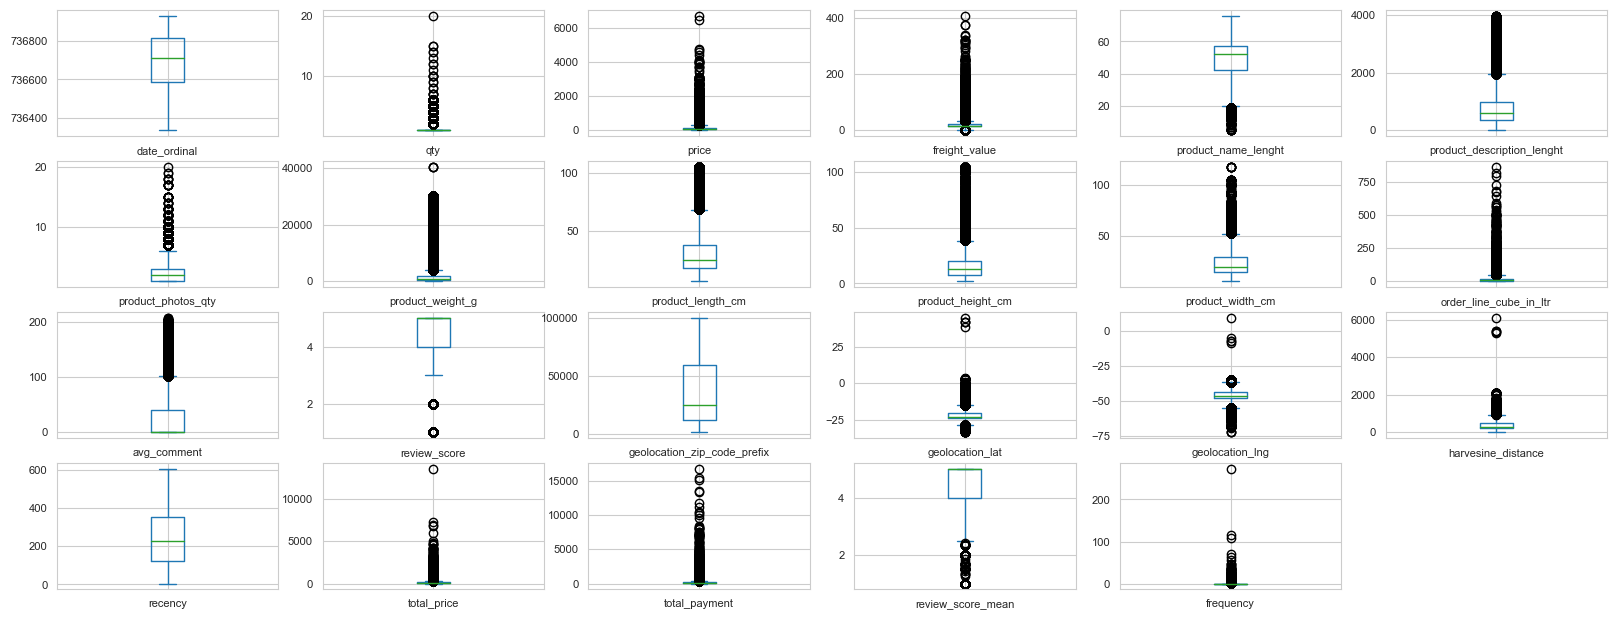

In [117]:

df_customer_data_mart.select_dtypes(include=["int32",'int64','float64']).plot(kind='box', subplots=True, figsize=(20,35), layout=(18,6), fontsize=8)
plt.title('Before treating outliers')
plt.show()

In [118]:
for col in df_customer_data_mart.select_dtypes(include=['int32','int64','float64']).columns:
    q1_col = df_customer_data_mart[col].quantile(0.01)
    q3_col = df_customer_data_mart[col].quantile(0.99)
    df_customer_data_mart[col] = np.where((df_customer_data_mart[col] > q3_col), q3_col, df_customer_data_mart[col]) 

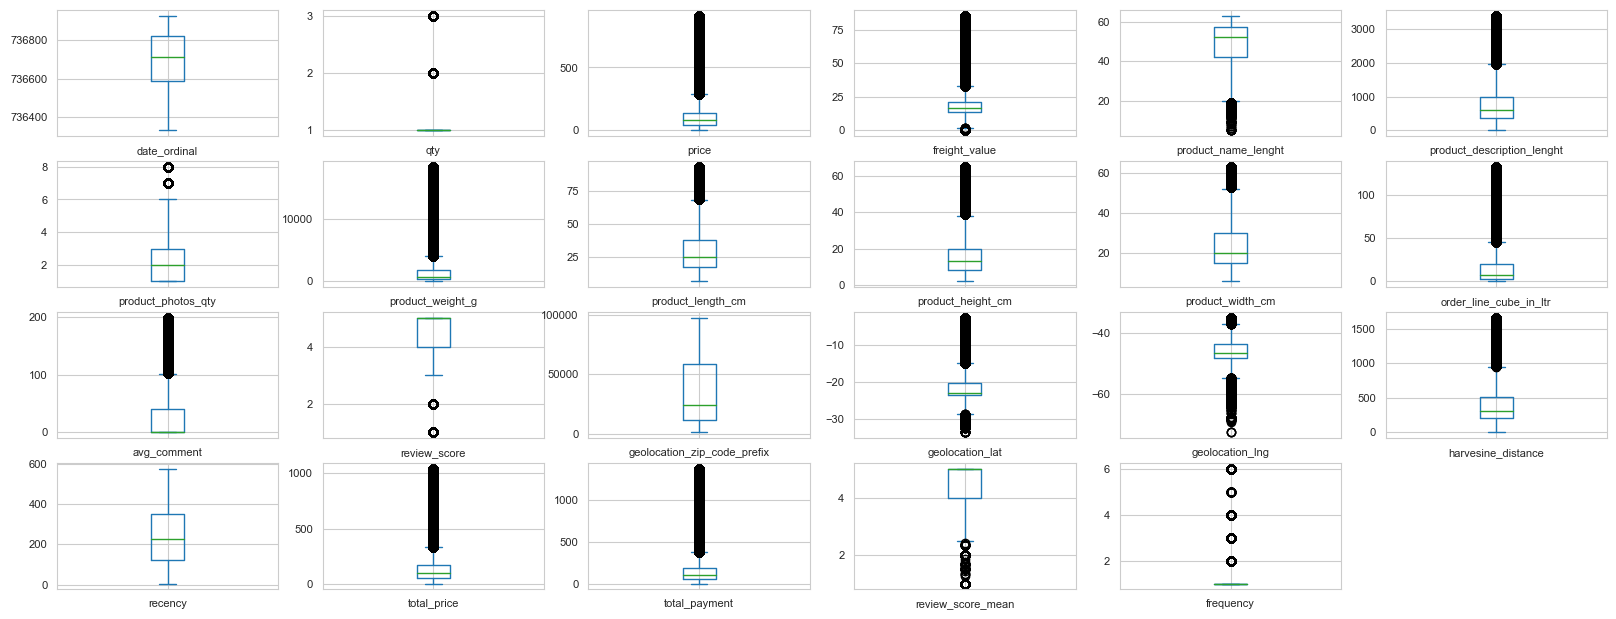

In [119]:
df_customer_data_mart.select_dtypes(include=["float64"]).plot(kind='box', subplots=True, figsize=(20,35), layout=(18,6), fontsize=8)
plt.title('After treating outliers')
plt.show()

In [120]:
#df_customer_data_mart = df_customer_data_mart.drop(Outliers_to_drop)

In [121]:
df_customer_data_mart.shape

(94427, 45)

In [122]:


df_customer_data_mart['product_category'] = df_customer_data_mart['product_category_name_english'].apply(classify_cat)

A investir aprés la modelisation des MLs ...on ne va pas  supprimer les outliears

In [123]:
df_customer_data_mart['product_category_encoded'] = df_customer_data_mart['product_category'].astype('category').cat.codes
# Convertir la colonne payment_type_encoded en int
df_customer_data_mart['product_category_encoded'] = df_customer_data_mart['product_category_encoded'].astype(int)

# Vérifier le type de données après conversion
print(df_customer_data_mart.dtypes)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_time                        object
delivery_time                     object
date_ordinal                     float64
shipping_time_delta               object
shipping_duration                 object
estimated_duration                object
product_id                        object
qty                              float64
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g

In [124]:
df_customer_data_mart['payment_type_encoded'] = df_customer_data_mart['payment_type'].astype('category').cat.codes
# Convertir la colonne payment_type_encoded en int
df_customer_data_mart['payment_type_encoded'] = df_customer_data_mart['payment_type_encoded'].astype(int)

# Vérifier le type de données après conversion
print(df_customer_data_mart.dtypes)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_time                        object
delivery_time                     object
date_ordinal                     float64
shipping_time_delta               object
shipping_duration                 object
estimated_duration                object
product_id                        object
qty                              float64
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g

In [125]:
df_customer_data_mart['shipping_duration']

0         11 days, 0:00:00
36        12 days, 0:00:00
45        11 days, 0:00:00
49        11 days, 0:00:00
50        11 days, 0:00:00
                ...       
115827     2 days, 0:00:00
115828     2 days, 0:00:00
115829      1 day, 0:00:00
115830      1 day, 0:00:00
115831      1 day, 0:00:00
Name: shipping_duration, Length: 94427, dtype: object

In [126]:
import pandas as pd

# Supposons que votre DataFrame soit df_customer_data_mart

# Convertir la colonne 'shipping_duration' en un objet timedelta
df_customer_data_mart['shipping_duration'] = pd.to_timedelta(df_customer_data_mart['shipping_duration'])

# Extraire le nombre de jours à partir de l'objet timedelta
df_customer_data_mart['shipping_duration_days'] = df_customer_data_mart['shipping_duration'].dt.days
# Convertir la colonne 'shipping_duration' en un objet timedelta
df_customer_data_mart['estimated_duration'] = pd.to_timedelta(df_customer_data_mart['estimated_duration'])

# Extraire le nombre de jours à partir de l'objet timedelta
df_customer_data_mart['estimated_duration_days'] = df_customer_data_mart['estimated_duration'].dt.days
# Afficher le DataFrame mis à jour
print(df_customer_data_mart)



                                order_id                       customer_id  \
0       9b91ddcbd6cbceb83d4fd2462ca1f95e  6152d0774bbbf74f7140541c0569dafa   
36      cce1b8a1c5f8b1d224e19628299c8f54  63433f6eb6f0a79cbb24e940d0ab17ad   
45      ce86fa5a5108884726a2244bcae51ae6  8fa33a3159dfc303b8aeccf859b9bee5   
49      7004296aa0256632eaddc171edaf727f  3a7856f2a103364d279de7f72e18b7c4   
50      34bf4feda1e203af64692d97c6950c39  64b56cb1662271f54a81d96a28741487   
...                                  ...                               ...   
115827  9344079d5fbb7dd79af908b7eb667db7  be169d57b327a59f2db49cffdc6caf13   
115828  ab7a53a8e94cab448240ff654797c44e  2f751d53058e28b3d51ad54852cc9c5e   
115829  03ef5dedbe7492bdae72eec50764c43f  496630b6740bcca28fce9ba50d8a26ef   
115830  d70442bc5e3cb7438da497cc6a210f80  10a79ef2783cae3d8d678e85fde235ac   
115831  912859fef5a0bd5059b6d48fa79d121a  b8c19e70d00f6927388e4f31c923d785   

       order_status order_purchase_timestamp order_approved_at 

In [127]:
categorical_columns = df_customer_data_mart.select_dtypes(['category','object']).columns
numerical_columns = df_customer_data_mart.select_dtypes(['int32','int64','float64']).columns

In [128]:
pd.set_option('display.max_columns', 50) 

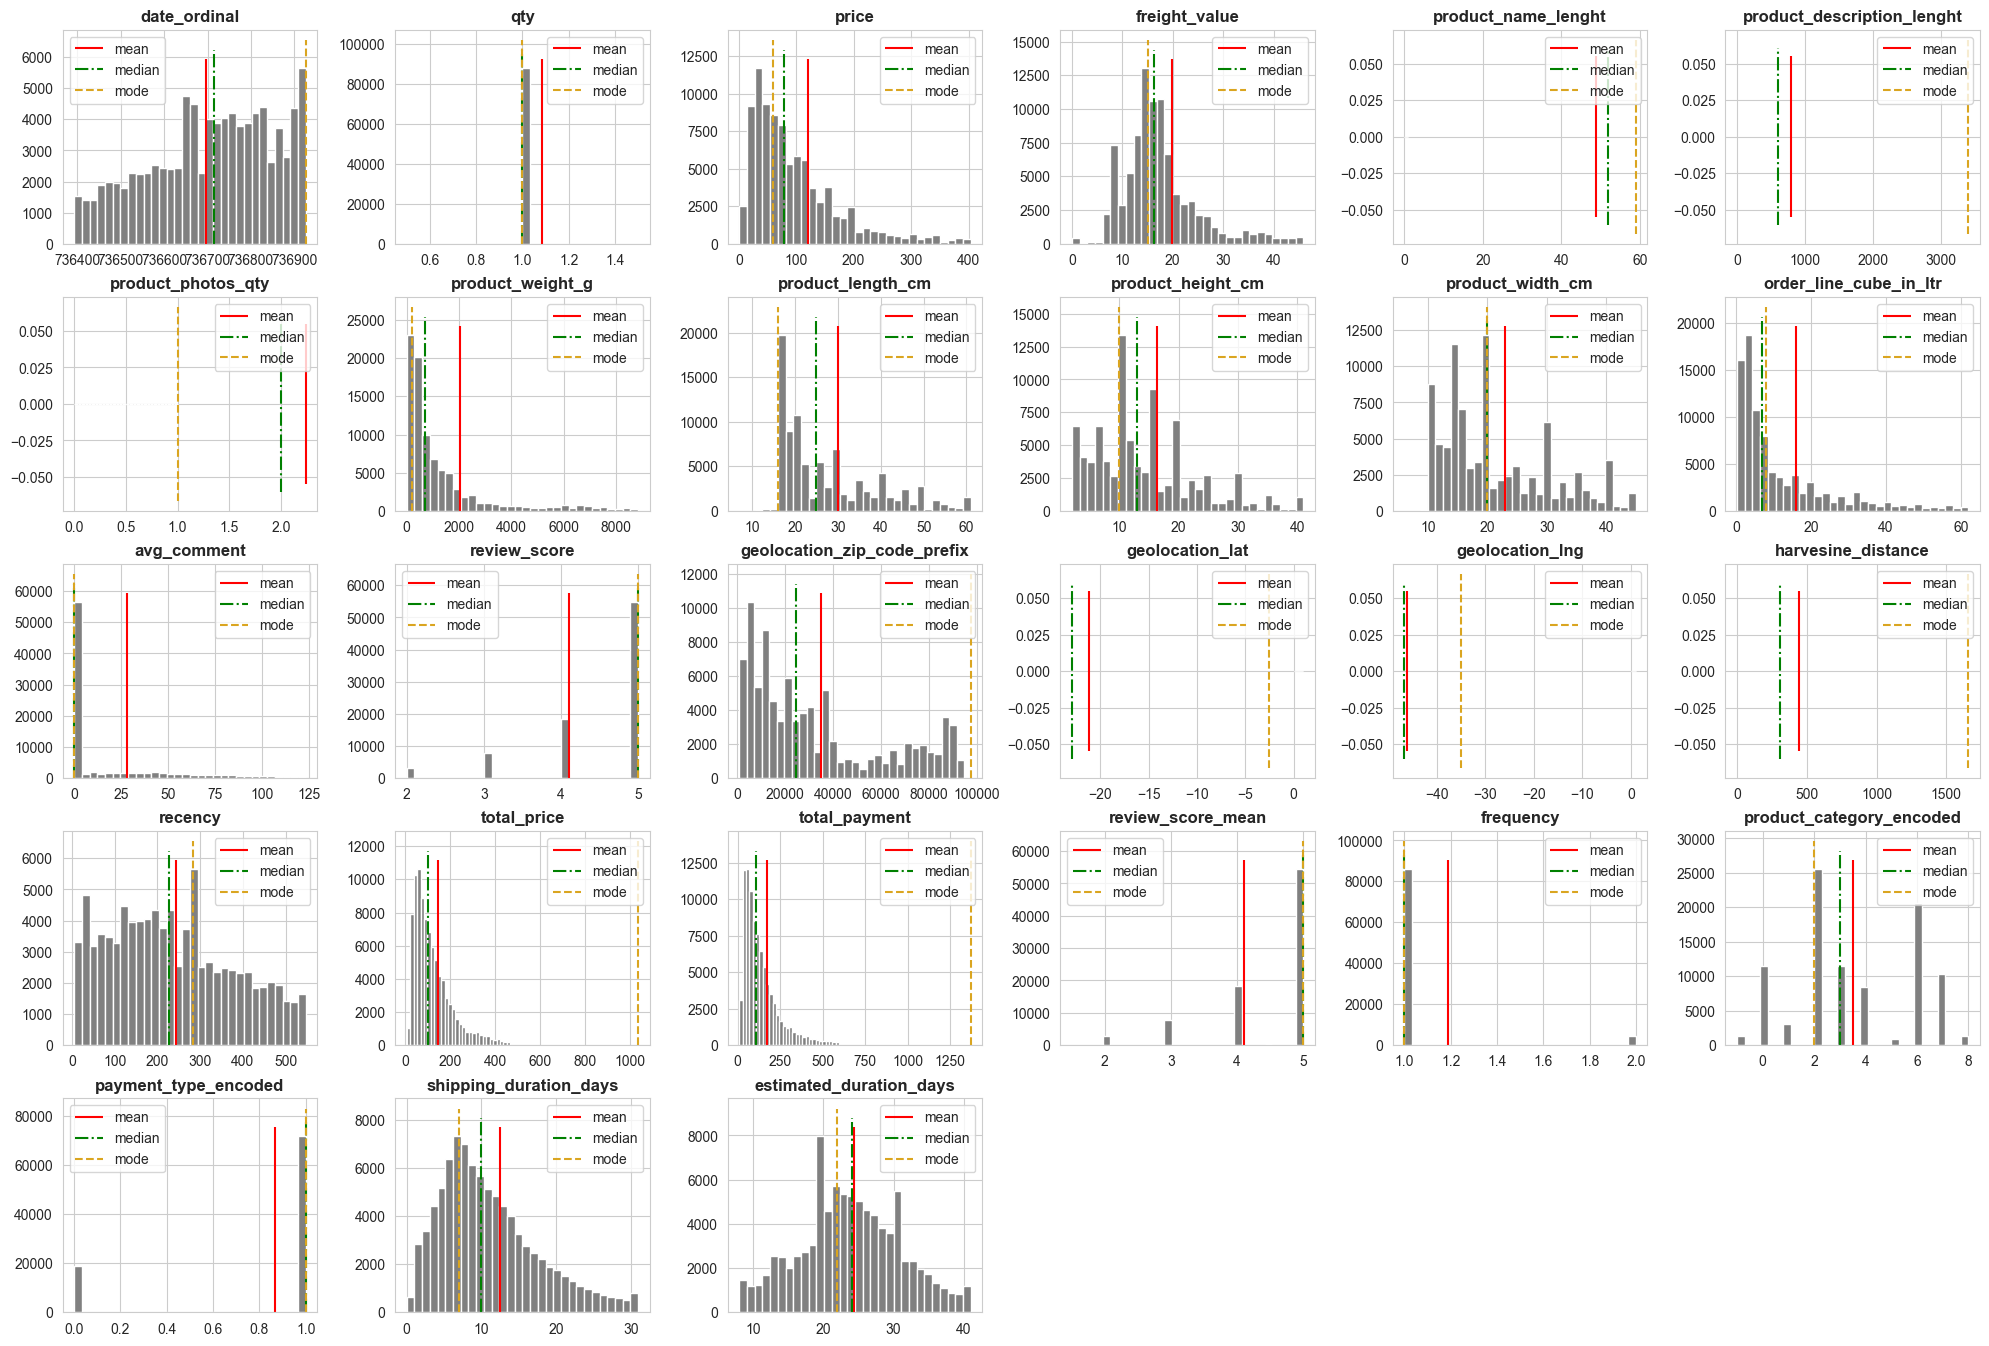

In [129]:
# Excluding outliers to get a better scale
plot_histograms(df=df_customer_data_mart, cols=numerical_columns, file_name='2_1_histograms.png',
                figsize=(20,16), bins=30, layout=(6,6), skip_outliers=True,
                thresh=2, save_enabled=False)

Frequency and Monetary are highly skewed i.e. the data is not evenly distributed. Applying log transformation to Frequency and Monetary to reduce the skewness.

In [130]:
df_customer_data_mart['estimated_duration_log'] = np.log(df_customer_data_mart['estimated_duration_days'])
df_customer_data_mart['shipping_duration_log'] = np.log(df_customer_data_mart['shipping_duration_days']+1e-10)
df_customer_data_mart['order_line_cube_in_ltr_log'] = np.log(df_customer_data_mart['order_line_cube_in_ltr'])
df_customer_data_mart['price_log'] = np.log(df_customer_data_mart['price'])
df_customer_data_mart['avg_comment_log'] = np.log(df_customer_data_mart['avg_comment']+1e-10)
df_customer_data_mart['total_payment_log'] = np.log(df_customer_data_mart['total_payment'])
df_customer_data_mart['recency_log'] = np.log(df_customer_data_mart['recency'])

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:111

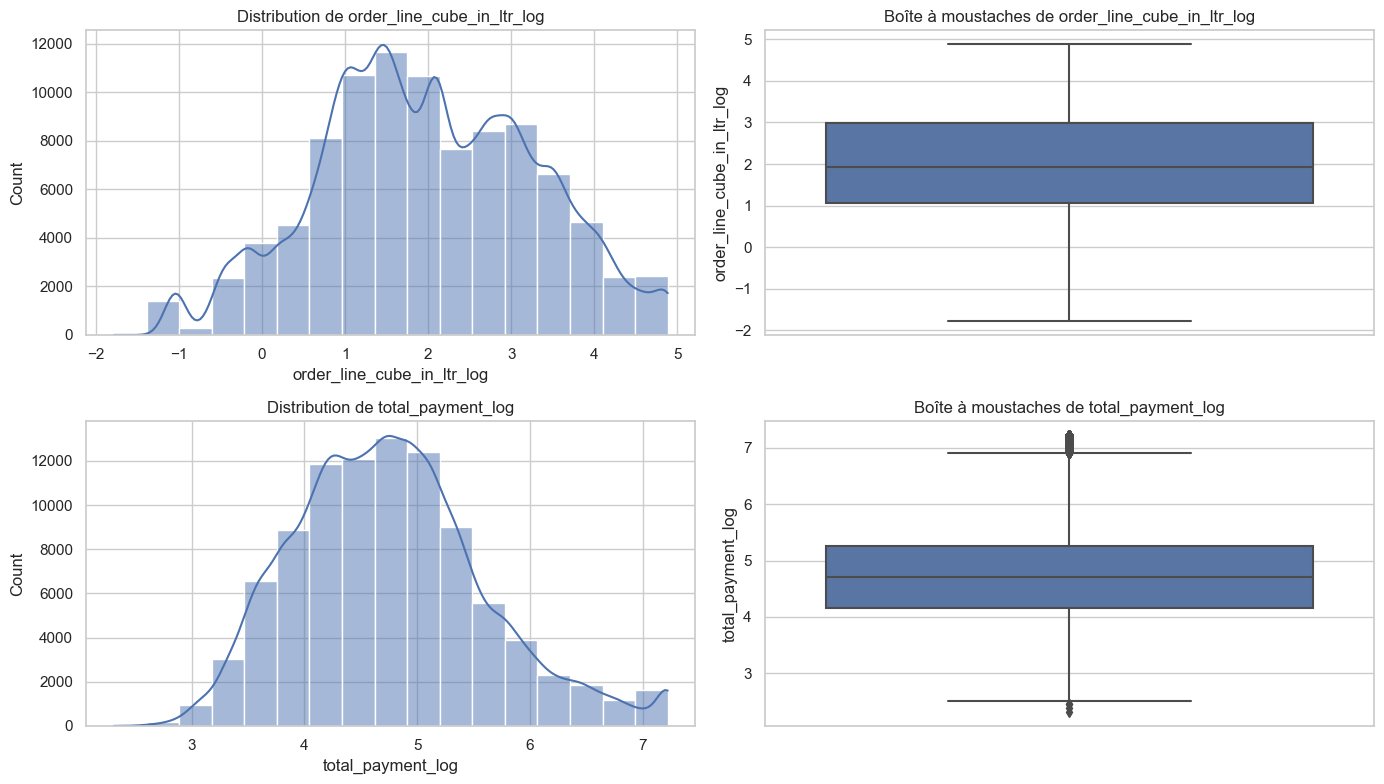

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style de Seaborn (facultatif)
sns.set(style="whitegrid")

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Variables à visualiser
variables = ["order_line_cube_in_ltr_log", "total_payment_log"]

# Boucle sur les variables
for i, var in enumerate(variables):
    # Histogramme
    sns.histplot(data=df_customer_data_mart, x=var, bins=int(1 + np.log2(len(df_customer_data_mart))), ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution de {var}')

    # Boîte à moustaches (boxplot)
    sns.boxplot(data=df_customer_data_mart, y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boîte à moustaches de {var}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:111

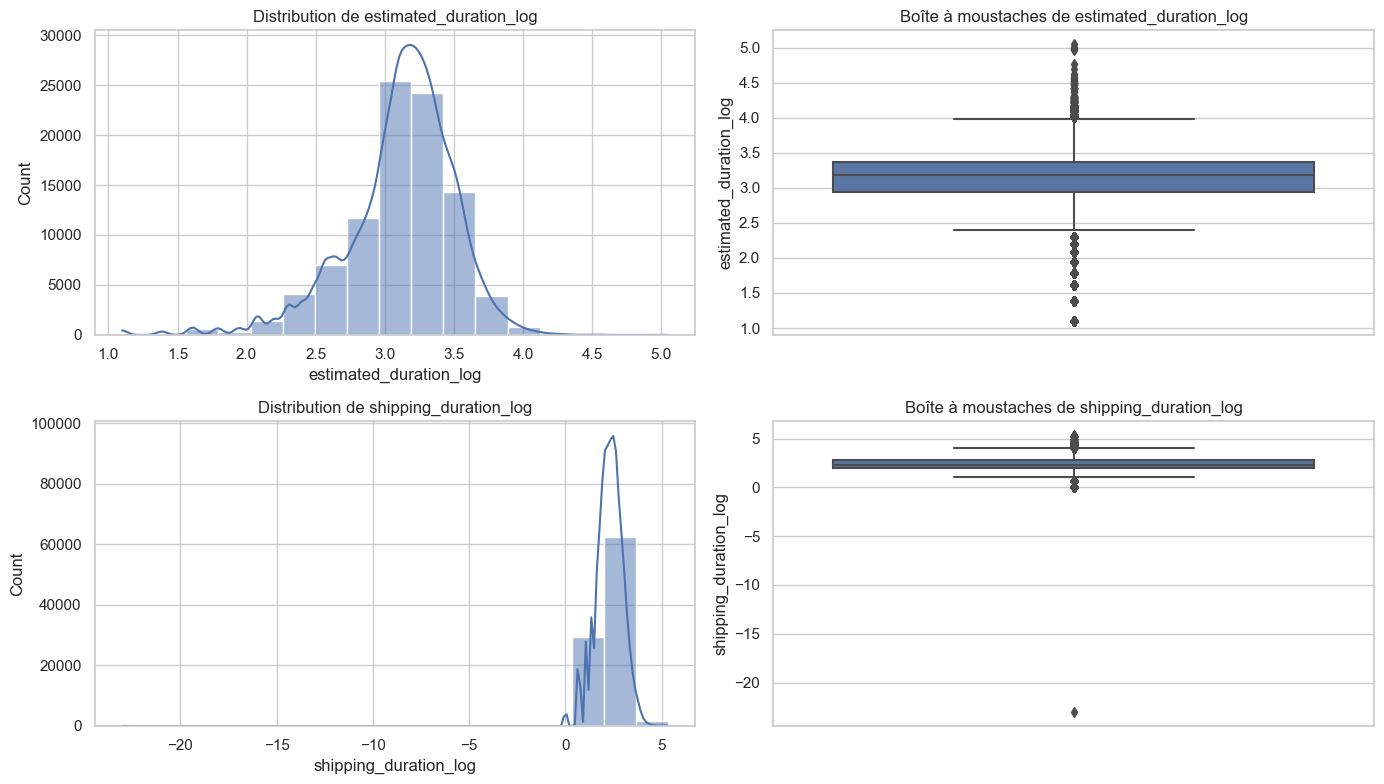

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style de Seaborn (facultatif)
sns.set(style="whitegrid")

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Variables à visualiser
variables = ["estimated_duration_log", "shipping_duration_log"]

# Boucle sur les variables
for i, var in enumerate(variables):
    # Histogramme
    sns.histplot(data=df_customer_data_mart, x=var, bins=int(1 + np.log2(len(df_customer_data_mart))), ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution de {var}')

    # Boîte à moustaches (boxplot)
    sns.boxplot(data=df_customer_data_mart, y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boîte à moustaches de {var}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


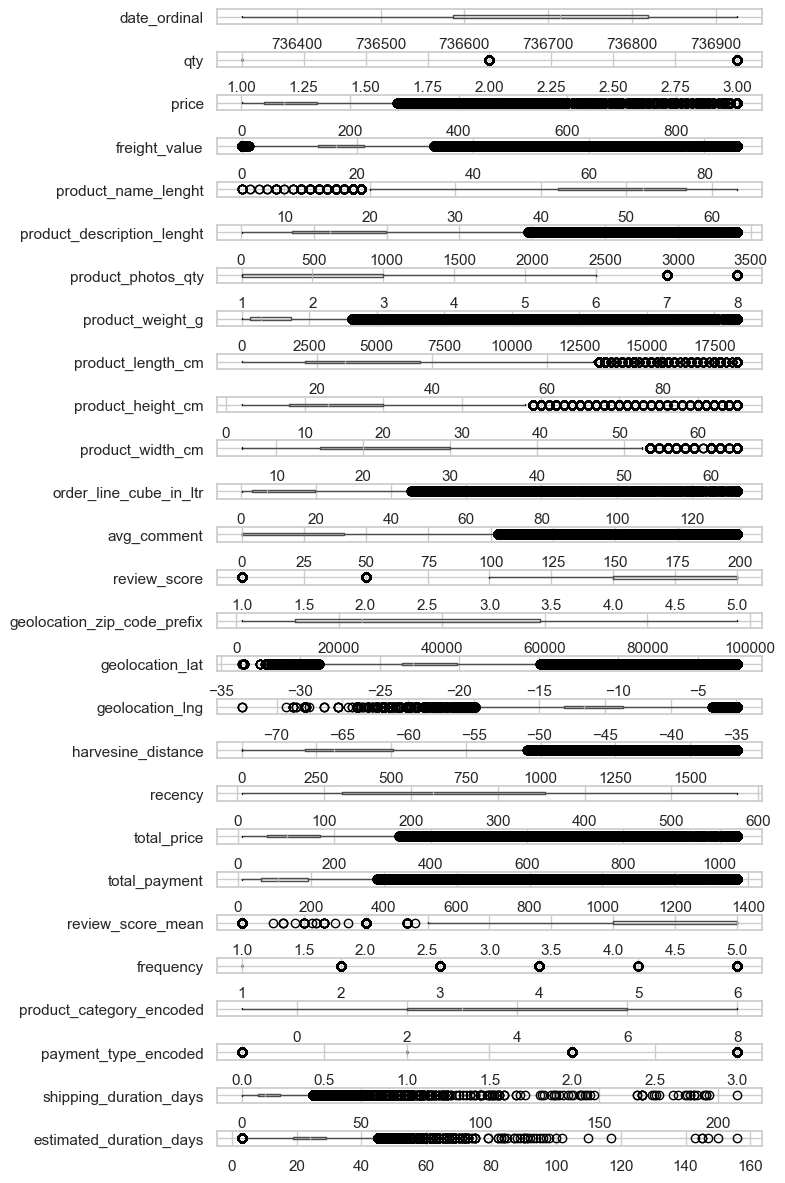

In [133]:
fig, axs = plt.subplots(len(df_customer_data_mart[numerical_columns].columns),1,
                        figsize=(8, 12), sharey=False)
for c, ax in zip(df_customer_data_mart[numerical_columns].columns, axs):
    df_customer_data_mart.boxplot(c, vert=False, ax=ax)
fig.tight_layout(h_pad=0.051)
plt.show()

In [134]:
categorical_columns=['state','city','product_category_name_english']
# Assurez-vous que les colonnes catégorielles sont de type objet (chaînes de caractères)
df_customer_data_mart['state'] = df_customer_data_mart['state'].astype(str)
df_customer_data_mart['city'] = df_customer_data_mart['city'].astype(str)
df_customer_data_mart['product_category_name_english'] = df_customer_data_mart['product_category_name_english'].astype(str)

In [135]:
# City disctribution
df_customer_data_mart['city'].value_counts().sort_values(ascending=False)

city
sao paulo            14714
rio de janeiro        6463
belo horizonte        2626
brasilia              2037
curitiba              1440
                     ...  
itaguacu da bahia        1
abadiania                1
vila flor                1
santa salete             1
agua doce                1
Name: count, Length: 4104, dtype: int64

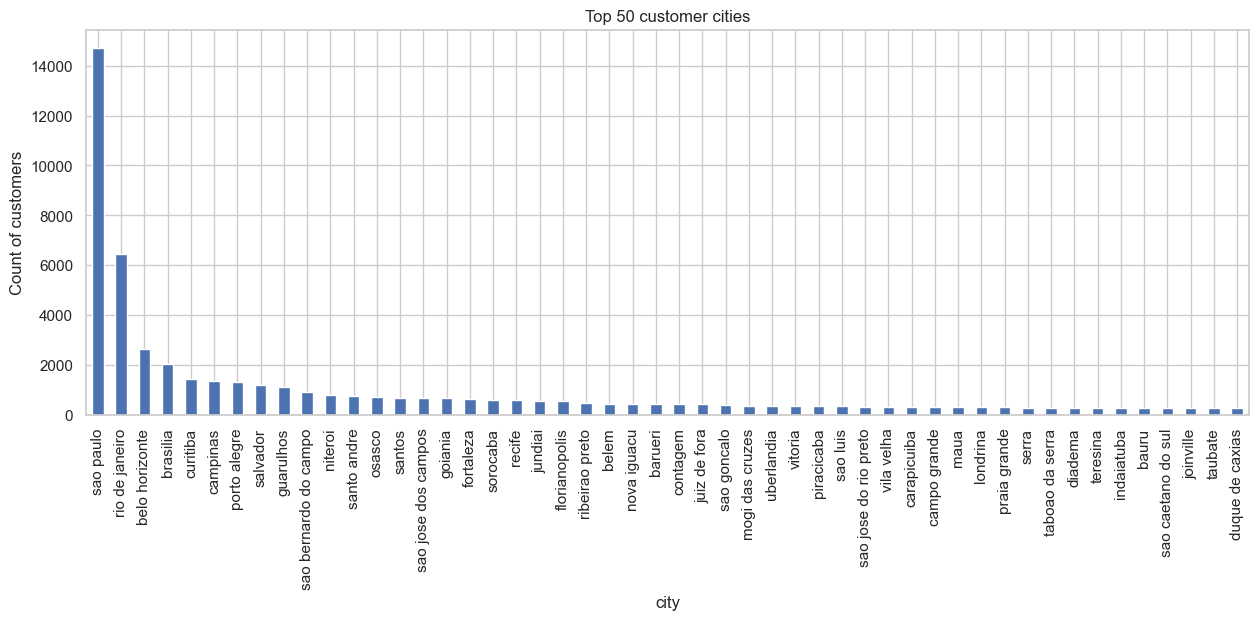

In [136]:
(
    df_customer_data_mart['city']
    .value_counts()
    .sort_values(ascending=False)
    .head(50)
    .plot(kind='bar', figsize=(15, 5))
)

plt.title('Top 50 customer cities')
plt.ylabel('Count of customers');

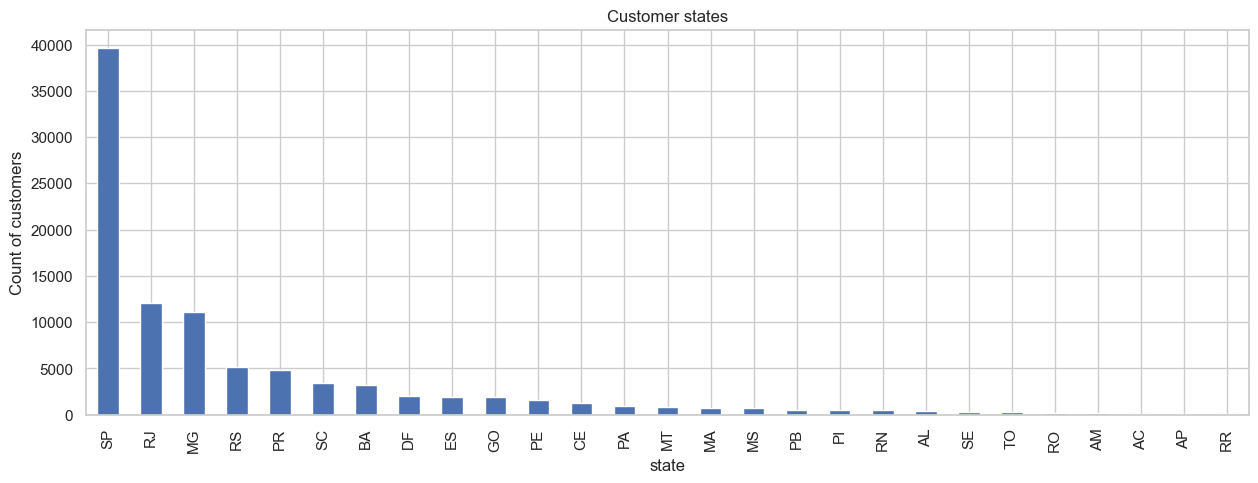

In [137]:
# States disctribution
(
    df_customer_data_mart['state']
    .value_counts()
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(15, 5))
)

plt.title('Customer states')
plt.ylabel('Count of customers');

In [138]:
df=df_customer_data_mart

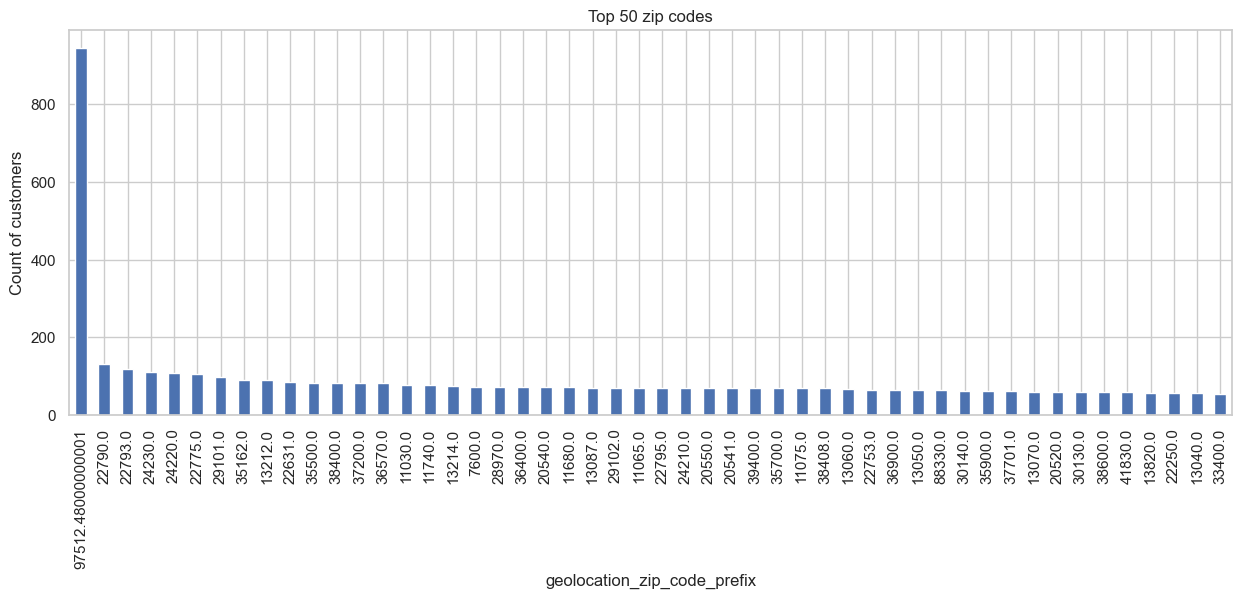

In [139]:
# Top 50 zip codes
(
    df['geolocation_zip_code_prefix']
    .value_counts()
    .sort_values(ascending=False)
    .head(50)
    .plot(kind='bar', figsize=(15, 5))
    )

plt.title('Top 50 zip codes')
plt.ylabel('Count of customers');

In [140]:
df_customer_dly = df.groupby(
    'customer_id',
    as_index=False).agg({
        'order_purchase_timestamp': 'min'
        })

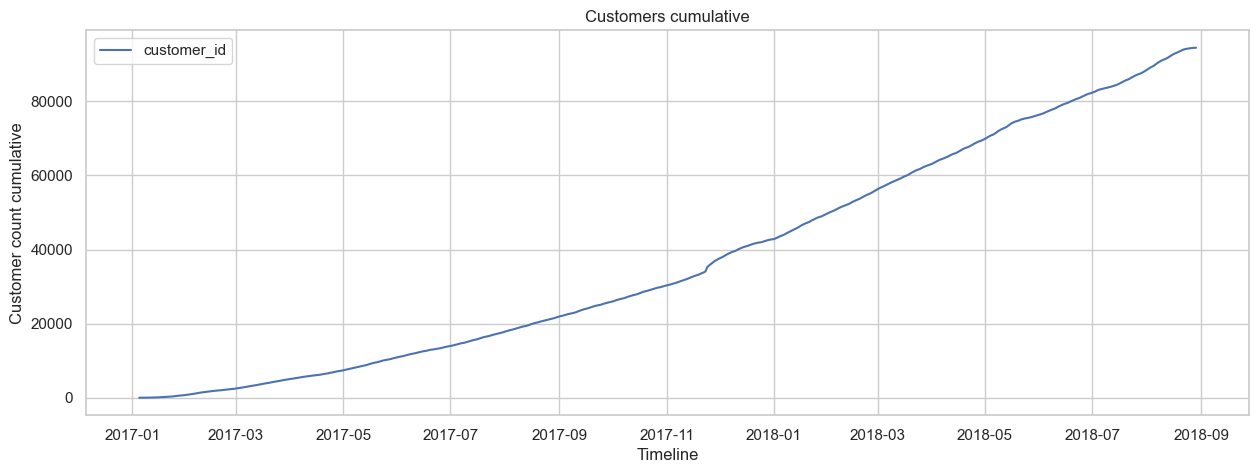

In [141]:
df_customer_dly.groupby('order_purchase_timestamp').count().cumsum().plot(figsize=(15,5))
plt.title('Customers cumulative')
plt.xlabel('Timeline')
plt.ylabel('Customer count cumulative');

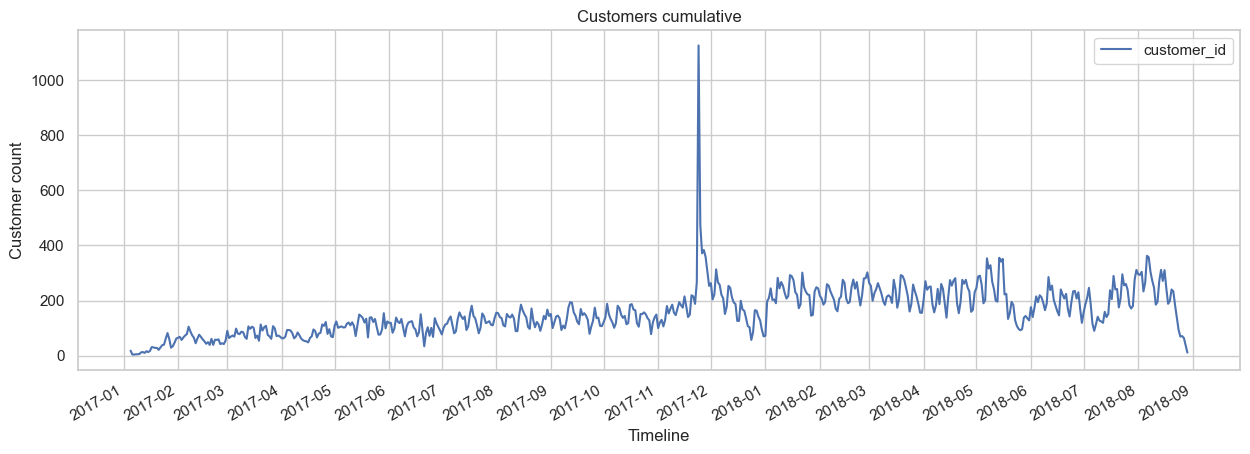

In [142]:
# New customers count by day
ax = df_customer_dly.groupby('order_purchase_timestamp').count().plot(figsize=(15,5))
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.title('Customers cumulative')
plt.xlabel('Timeline')
plt.ylabel('Customer count');

# Conclusion
Les clients proviennent de 4119 villes et 27 États.
La plupart des clients vivent à São Paulo, avec un facteur de 2 par rapport à la deuxième ville la mieux classée, Rio de Janeiro.
Beaucoup de nouveaux clients sont apparus lors du Black Friday. Il est intéressant de noter que l'impact n'est pas très prononcé lorsqu'on regarde le nombre cumulatif de clients sur toute la période.
Dans l'ensemble, l'augmentation du nombre de clients présente une tendance à la hausse. La ligne de tendance est légèrement exponentielle

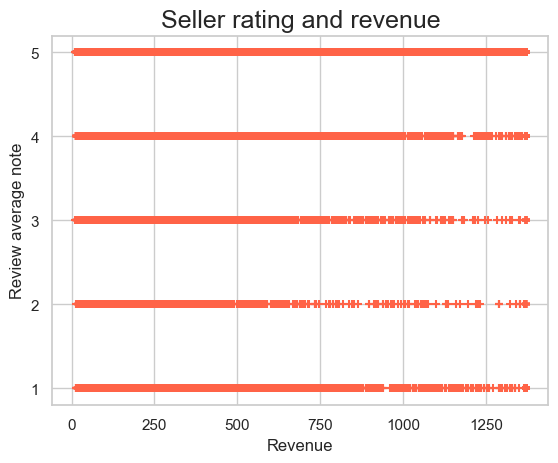

In [143]:
sellerpop = plt.scatter( y=df['review_score'], x=df["total_payment"],marker = '+', color = 'tomato');
sns.set_context("talk")
plt.xlabel('Revenue')
plt.ylabel('Review average note')
plt.title('Seller rating and revenue')
plt.show()

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



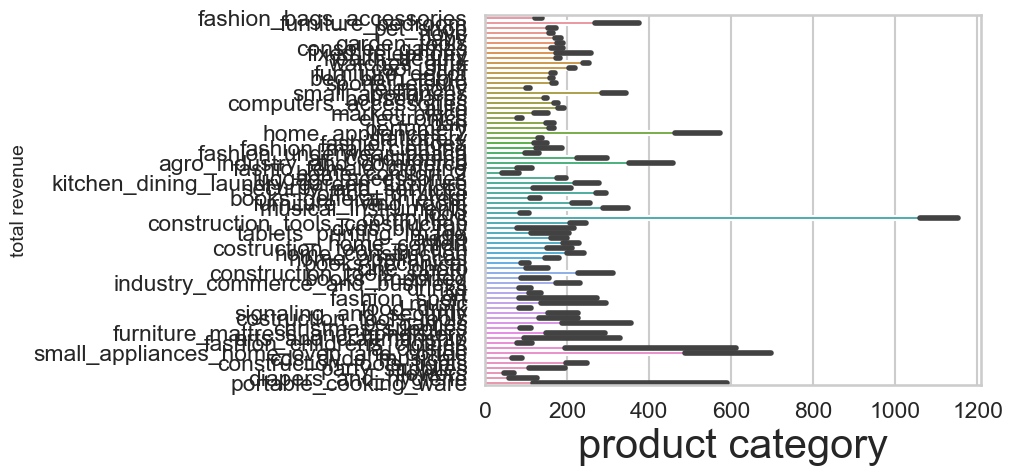

In [144]:
cat_revenue_hist = sns.barplot( y=df["product_category_name_english"], x=df["total_payment"] );
sns.set(rc={'figure.figsize':(20,25)})
plt.xlabel('product category', fontsize = 30)
plt.ylabel('total revenue', fontsize = 14)
plt.show()

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: title={'center': 'Customers Per State'}, xlabel='state', ylabel='No of Customers'>

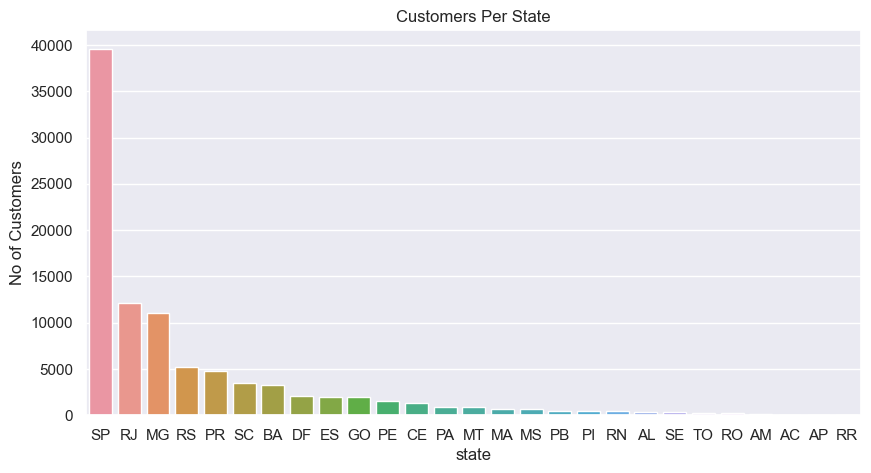

In [145]:
plt.figure(figsize=(10,5))
plt.title('Customers Per State')
plt.ylabel('No of Customers')
plt.xlabel('States')
sns.barplot(x=df['state'].value_counts().index,y=df['state'].value_counts().values)

In [146]:
df_customer_data_mart.shape

(94427, 57)

In [147]:
# Supprimer les doublons dans la colonne 'customer_unique_id'
df_customer_data_mart.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)

# Afficher le DataFrame après suppression des doublons
print(df_customer_data_mart)

                                order_id                       customer_id  \
0       9b91ddcbd6cbceb83d4fd2462ca1f95e  6152d0774bbbf74f7140541c0569dafa   
36      cce1b8a1c5f8b1d224e19628299c8f54  63433f6eb6f0a79cbb24e940d0ab17ad   
45      ce86fa5a5108884726a2244bcae51ae6  8fa33a3159dfc303b8aeccf859b9bee5   
49      7004296aa0256632eaddc171edaf727f  3a7856f2a103364d279de7f72e18b7c4   
50      34bf4feda1e203af64692d97c6950c39  64b56cb1662271f54a81d96a28741487   
...                                  ...                               ...   
115827  9344079d5fbb7dd79af908b7eb667db7  be169d57b327a59f2db49cffdc6caf13   
115828  ab7a53a8e94cab448240ff654797c44e  2f751d53058e28b3d51ad54852cc9c5e   
115829  03ef5dedbe7492bdae72eec50764c43f  496630b6740bcca28fce9ba50d8a26ef   
115830  d70442bc5e3cb7438da497cc6a210f80  10a79ef2783cae3d8d678e85fde235ac   
115831  912859fef5a0bd5059b6d48fa79d121a  b8c19e70d00f6927388e4f31c923d785   

       order_status order_purchase_timestamp order_approved_at 

In [148]:
df_customer_data_mart.to_csv('../data/df_customer_data_mart.csv')